In [ ]:
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from pathlib import Path

In [ ]:
files = ["shared_m1_final-Schirrmeister2017-alignment-exp_1-0-both_results.csv","shared_m1_final-Schirrmeister2017-no-alignment-exp_1-0-both_results.csv",
         "shared_m2_final-Schirrmeister2017-alignment-exp_1-0-both_results.csv", "shared_m2_final-Schirrmeister2017-no-alignment-exp_1-0-both_results.csv",
         "shared_m3_final-Schirrmeister2017-alignment-exp_1-0-both_results.csv", "shared_m3_final-Schirrmeister2017-no-alignment-exp_1-0-both_results.csv",
         "shared_m1_final-BNCI2014001-alignment-exp_1-0-both_results.csv","shared_m1_final-BNCI2014001-no-alignment-exp_1-0-both_results.csv",
         "shared_m2_final-BNCI2014001-alignment-exp_1-0-both_results.csv","shared_m2_final-BNCI2014001-no-alignment-exp_1-0-both_results.csv",
         "shared_m3_final-BNCI2014001-alignment-exp_1-0-both_results.csv","shared_m3_final-BNCI2014001-no-alignment-exp_1-0-both_results.csv"]

df_merge = pd.concat([pd.read_csv(file) for file in files])

df_exp2 = df_merge

df_exp2['EA'] = [output[-1] for output in df_exp2['pipeline'].str.replace("Without_EA","WithoutEA").str.split("_")]
df_exp2['model'] = [output[0] for output in df_exp2['pipeline'].str.replace("Without_EA","WithoutEA").str.split("_")]

df_exp2['score'] = df_exp2['score']*100
df_exp2 = df_exp2[df_exp2["exp"] != "zero_shot"].reset_index(drop=True)

df_exp2['EA'] = pd.Categorical(df_exp2['EA'],
             categories=['WithoutEA', 'EA'],
             ordered=True,)
#
df_exp2 = df_exp2.sort_values(
    ["dataset", 'model', 'EA'], ascending=True
)

# For each subj
df_exp2["aux"] = df_exp2['exp'].astype(str) +"-"+ df_exp2["EA"].astype(str)

df_exp2 = df_exp2[df_exp2["aux"] != "1run-WithoutEA"].reset_index(drop=True)
df_exp2.loc[df_exp2['dataset']=='001-2014', 'dataset'] = 'BNCI2014'
df_exp2.loc[df_exp2['model']=='Deep4Net', 'model'] = 'DeepNet'
df_exp2.loc[df_exp2['model']=='ShallowFBCSPNet', 'model'] = 'ShallowNet'
df_exp2.loc[df_exp2['model']=='EEGNetv4', 'model'] = 'EEGNet'

In [ ]:
datasets = df_exp2['dataset'].unique()
models = df_exp2['model'].unique()
auxs = df_exp2['aux'].unique()

for aux in auxs:

  print(aux)

  df_exp = df_exp2[df_exp2['aux']==aux]

  print()
  print('Overall')
  print(df_exp['score'].mean()/100)
  print('Std')
  print(df_exp['score'].std()/100)
  print()
  print('Per dataset')
  for data in datasets:
    df_data = df_exp[df_exp['dataset']==data]
    print(f"{data}: {df_data['score'].mean()/100}")
    print('Std ', df_data['score'].std()/100)
  print()
  print('Per model')
  for model in models:
    df_model = df_exp[df_exp['model']==model]
    print(f"{model}: {df_model['score'].mean()/100}")
    print('Std ', df_model['score'].std()/100)
  print()
  print("*****************")



shared-WithoutEA

Overall
0.7047957603256337
Std
0.12426143652046612

Per dataset
BNCI2014: 0.6893518518518519
Std  0.12612612928798067
Schirrmeister2017: 0.7246522140776389
Std  0.12039903484317213

Per model
DeepNet: 0.6927104801167542
Std  0.12443962988272891
EEGNet: 0.7217635592248596
Std  0.13141912650278273
ShallowNet: 0.6999132416352873
Std  0.11870183660996378

*****************
fine-tuning-WithoutEA

Overall
0.7191484576134303
Std
0.12072696381128104

Per dataset
BNCI2014: 0.7067901234567902
Std  0.12104404826215527
Schirrmeister2017: 0.7350377443862535
Std  0.11988163504126371

Per model
DeepNet: 0.7074373256018417
Std  0.12644490072461445
EEGNet: 0.7447994195622328
Std  0.12351102945617651
ShallowNet: 0.7052086276762168
Std  0.11135832183241638

*****************
shared-EA

Overall
0.7606744993014262
Std
0.11656451135893371

Per dataset
BNCI2014: 0.7398148148148147
Std  0.11213885273224183
Schirrmeister2017: 0.7874940936413551
Std  0.11797101631606528

Per model
DeepNet: 0.7

# Plot

In [ ]:
FONTSIZE = 8

# A4 width: 6.3 inches 2*1.25 margins --> 5.8 figures
W = 5.8 * 1.75

plt.rcParams["figure.figsize"] = (W*1.4,1.1* W / 3.7)
plt.rcParams["axes.grid"] = False
fontsize = FONTSIZE * 2
lw = 1.3
plt.rcParams.update({
    'font.size': fontsize,
    'legend.fontsize': 'x-small',
    'axes.labelsize': 'small',
    'xtick.labelsize': 'xx-small',
    'ytick.labelsize': 'small',
    'axes.titlesize': 'medium',
    'lines.linewidth': lw,
})

## Offline + Online

In [ ]:
# Plot without fine-tuning

In [ ]:
files = ["shared_m1_final-Schirrmeister2017-alignment-exp_1-0-both_results.csv","shared_m1_final-Schirrmeister2017-no-alignment-exp_1-0-both_results.csv",
         "shared_m2_final-Schirrmeister2017-alignment-exp_1-0-both_results.csv", "shared_m2_final-Schirrmeister2017-no-alignment-exp_1-0-both_results.csv",
         "shared_m3_final-Schirrmeister2017-alignment-exp_1-0-both_results.csv", "shared_m3_final-Schirrmeister2017-no-alignment-exp_1-0-both_results.csv",
         "shared_m1_final-BNCI2014001-alignment-exp_1-0-both_results.csv","shared_m1_final-BNCI2014001-no-alignment-exp_1-0-both_results.csv",
         "shared_m2_final-BNCI2014001-alignment-exp_1-0-both_results.csv","shared_m2_final-BNCI2014001-no-alignment-exp_1-0-both_results.csv",
         "shared_m3_final-BNCI2014001-alignment-exp_1-0-both_results.csv","shared_m3_final-BNCI2014001-no-alignment-exp_1-0-both_results.csv"]

df_merge = pd.concat([pd.read_csv(file) for file in files])

df_exp2 = df_merge[df_merge['exp'] != 'fine-tuning']
df_exp2 = df_exp2.reset_index(drop=True)

df_exp2['EA'] = [output[-1] for output in df_exp2['pipeline'].str.replace("Without_EA","WithoutEA").str.split("_")]
df_exp2['model'] = [output[0] for output in df_exp2['pipeline'].str.replace("Without_EA","WithoutEA").str.split("_")]

df_exp2['score'] = df_exp2['score']*100
df_exp2 = df_exp2[df_exp2["exp"] != "zero_shot"].reset_index(drop=True)

df_exp2['EA'] = pd.Categorical(df_exp2['EA'],
             categories=['WithoutEA', 'EA'],
             ordered=True,)
#
df_exp2 = df_exp2.sort_values(
    ["dataset", 'model', 'EA'], ascending=True
)

# For each subj
df_exp2["aux"] = df_exp2['exp'].astype(str) +"-"+ df_exp2["EA"].astype(str)

df_exp2 = df_exp2[df_exp2["aux"] != "1run-WithoutEA"].reset_index(drop=True)
df_exp2.loc[df_exp2['dataset']=='001-2014', 'dataset'] = 'BNCI2014'
df_exp2.loc[df_exp2['model']=='Deep4Net', 'model'] = 'DeepNet'
df_exp2.loc[df_exp2['model']=='ShallowFBCSPNet', 'model'] = 'ShallowNet'
df_exp2.loc[df_exp2['model']=='EEGNetv4', 'model'] = 'EEGNet'

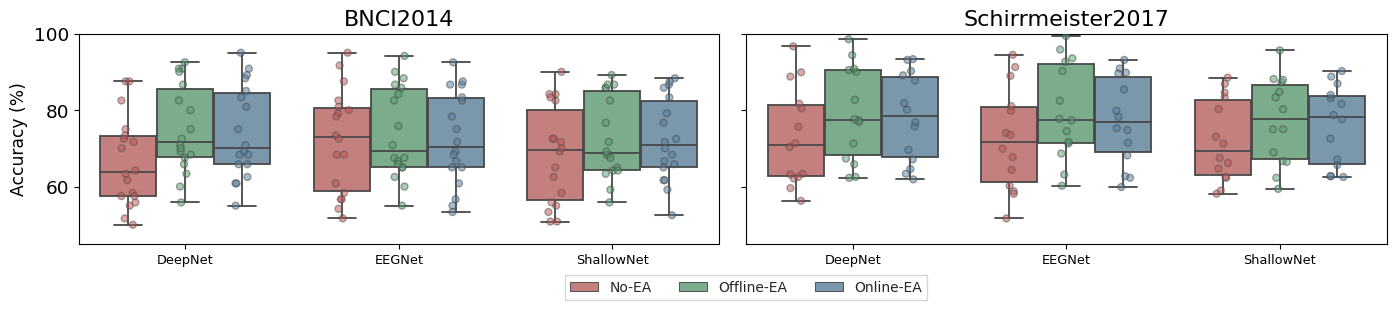

In [ ]:
fig, ax = plt.subplots(1,2)
#palette_colours = ['#783332','#325730','#30426B','#C25251', '#447C55', '#447696', '#FF8685', '#51C273', '#4896A1']
palette_colours = ['#C25251', '#50A16A', '#507FA1']
#sns.set_context("paper")
sns.set_style("whitegrid")

for i in range(len(df_exp2['dataset'].unique())):
    data = df_exp2['dataset'].unique()[i]

    df_data = df_exp2[df_exp2['dataset']==data]


    ax[i].title.set_text(data)

    ax[i] = sns.boxplot(data=df_data, y="score", x="model", orient='v', ax=ax[i],
                    palette=palette_colours,
                    hue=df_data[["EA", "exp"]].apply(tuple, axis=1),)
    ax[i].legend([],[], frameon=False)
    ax[i].set_facecolor("white")
    if i == 1 :
        ax[i].set(yticklabels=[])

    for patch in ax[i].patches:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .8))

    ax[i] = sns.stripplot(data=df_data, y="score", x="model", linewidth=1, alpha=.5,
                       hue=df_data[["EA", "exp"]].apply(tuple, axis=1), ax=ax[i],
                       dodge=True, legend = False, palette=palette_colours)

    ax[i].legend([],[], frameon=False)

    ax[i].set_facecolor("white")

    ax[i].set_xlabel("")
    if i == 1 :
      ax[i].set_ylabel("")
    else:
      ax[i].set_ylabel("Accuracy (%)", fontsize=fontsize/1.3)
    ax[i].set_ylim(45, 100)
    plt.yticks(fontsize=fontsize/1.4)

fig.tight_layout(pad=1.0)
#plt.tight_layout()
#new_labels= ["DeepNet","DeepNet-EA", "DeepNet-online-EA","EEGNet","EEGNet-EA", "EEGNet-online-EA","ShallowNet", "ShallowNet-EA", "ShallowNet-online-EA"]
new_labels = ['No-EA', 'Offline-EA', 'Online-EA']
handles, previous_labels = ax[1].get_legend_handles_labels()
legend = ax[1].legend(handles=handles, labels=new_labels, loc='lower center', bbox_to_anchor=(0, -0.3), #(0.5, -0.4)
                   fancybox=False, shadow=False, ncol=3, fontsize=fontsize/1.6)

frame = legend.get_frame()
frame.set_facecolor('white')
fig.savefig(f"experiment_off-on_all_split_v2.pdf", format='pdf', dpi=300, bbox_inches='tight')



## Fine-tuning

In [ ]:
files = ["shared_m1_final-Schirrmeister2017-alignment-exp_1-0-both_results.csv","shared_m1_final-Schirrmeister2017-no-alignment-exp_1-0-both_results.csv",
         "shared_m2_final-Schirrmeister2017-alignment-exp_1-0-both_results.csv", "shared_m2_final-Schirrmeister2017-no-alignment-exp_1-0-both_results.csv",
         "shared_m3_final-Schirrmeister2017-alignment-exp_1-0-both_results.csv", "shared_m3_final-Schirrmeister2017-no-alignment-exp_1-0-both_results.csv",
         "shared_m1_final-BNCI2014001-alignment-exp_1-0-both_results.csv","shared_m1_final-BNCI2014001-no-alignment-exp_1-0-both_results.csv",
         "shared_m2_final-BNCI2014001-alignment-exp_1-0-both_results.csv","shared_m2_final-BNCI2014001-no-alignment-exp_1-0-both_results.csv",
         "shared_m3_final-BNCI2014001-alignment-exp_1-0-both_results.csv","shared_m3_final-BNCI2014001-no-alignment-exp_1-0-both_results.csv"]

df_merge = pd.concat([pd.read_csv(file) for file in files])

df_merge['EA'] = [output[-1] for output in df_merge['pipeline'].str.replace("Without_EA","WithoutEA").str.split("_")]
df_merge['model'] = [output[0] for output in df_merge['pipeline'].str.replace("Without_EA","WithoutEA").str.split("_")]

df_merge['score'] = df_merge['score']*100
df_exp2 = df_merge[df_merge["exp"] != "zero_shot"].reset_index(drop=True)
#df_exp2 = df_exp2[df_exp2["exp"] != "shared"].reset_index(drop=True)
df_exp2['EA'] = pd.Categorical(df_exp2['EA'],
             categories=['WithoutEA', 'EA'],
             ordered=True,)
#
df_exp2 = df_exp2.sort_values(
    ["dataset", 'model', 'EA'], ascending=True
)
# For each subj
df_exp2["aux"] = df_exp2['exp'].astype(str) +"-"+ df_exp2["EA"].astype(str)
# To plot
df_exp2 = df_exp2[df_exp2["aux"] != "1run-WithoutEA"].reset_index(drop=True)
df_exp2 = df_exp2[df_exp2["aux"] != "shared-EA"].reset_index(drop=True)

# Renaming
df_exp2.loc[df_exp2['dataset']=='001-2014', 'dataset'] = 'BNCI2014'
df_exp2.loc[df_exp2['model']=='Deep4Net', 'model'] = 'DeepNet'
df_exp2.loc[df_exp2['model']=='ShallowFBCSPNet', 'model'] = 'ShallowNet'
df_exp2.loc[df_exp2['model']=='EEGNetv4', 'model'] = 'EEGNet'

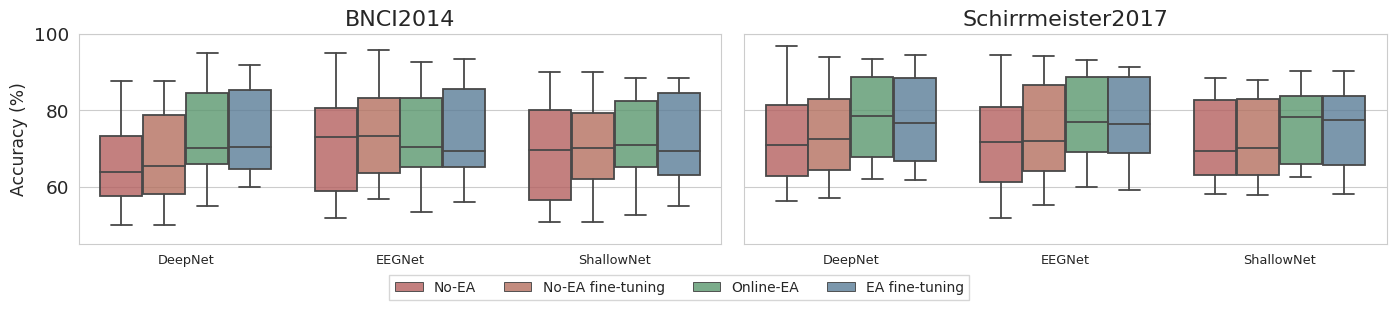

In [ ]:
fig, ax = plt.subplots(1,2)
#palette_colours = ['#783332','#325730','#30426B','#C25251', '#447C55', '#447696', '#FF8685', '#51C273', '#4896A1']
palette_colours = [ '#C25251', '#C26751', '#50A16A', '#507FA1']
#sns.set_context("paper")
sns.set_style("whitegrid")

for i in range(len(df_exp2['dataset'].unique())):
    data = df_exp2['dataset'].unique()[i]

    df_data = df_exp2[df_exp2['dataset']==data]

    ax[i].title.set_text(data)

    ax[i] = sns.boxplot(data=df_data, y="score", x="model", ax=ax[i],
                    palette=palette_colours, # saturation = .8,
                    hue=df_data[["EA", "exp"]].apply(tuple, axis=1),)
    ax[i].legend([],[], frameon=False)
    ax[i].set_facecolor("white")
    if i == 1 :
        ax[i].set(yticklabels=[])

    for patch in ax[i].patches:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .8))

    #ax[i] = sns.stripplot(data=df_data, y="score", x="model", linewidth=1, alpha=.5,
    #                   hue=df_data[["EA", "exp"]].apply(tuple, axis=1), ax=ax[i],
    #                   dodge=True, legend = False, palette=palette_colours)

    ax[i].legend([],[], frameon=False)

    ax[i].set_facecolor("white")

    ax[i].set_xlabel("")
    if i == 1 :
      ax[i].set_ylabel("")
    else:
      ax[i].set_ylabel("Accuracy (%)", fontsize=fontsize/1.3)
    ax[i].set_ylim(45, 100)
    plt.yticks(fontsize=fontsize/1.4)

fig.tight_layout(pad=1.0)
#plt.tight_layout()
#new_labels= ["DeepNet","DeepNet-EA", "DeepNet-online-EA","EEGNet","EEGNet-EA", "EEGNet-online-EA","ShallowNet", "ShallowNet-EA", "ShallowNet-online-EA"]
new_labels = ['No-EA', 'No-EA fine-tuning', 'Online-EA', "EA fine-tuning"]
handles, previous_labels = ax[1].get_legend_handles_labels()
legend = ax[1].legend(handles=handles, labels=new_labels, loc='lower center', bbox_to_anchor=(-0.1, -0.3),
                   fancybox=False, shadow=False, ncol=4, fontsize=fontsize/1.6)

frame = legend.get_frame()
frame.set_facecolor('white')
fig.savefig(f"experiment_ft-on_all_split_v2.pdf", format='pdf', dpi=300, bbox_inches='tight')

